<a href="https://colab.research.google.com/github/doblepensador/Tests/blob/master/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import multiprocessing
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [36]:
from sklearn.svm import SVR, SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [4]:
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_iris, load_breast_cancer, load_wine




# Support Vector Regression (Diabetes Dataset)


## Before scaling data

In [15]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = SVR()
model.fit(X_train, y_train)
print("Score for the train set: {}".format(model.score(X_train, y_train)))
print("Score for the test set: {}".format(model.score(X_test, y_test)))


Score for the train set: 0.16903622913048566
Score for the test set: 0.16052845977809527


## After scaling data

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
# df_scaled = pd.DataFrame(data = df_scaled)

model = SVR()
model.fit(X_train_scaled, y_train)
print("Score for the train set: {}".format(model.score(X_train_scaled, y_train)))
print("Score for the test set: {}".format(model.score(X_test_scaled, y_test)))

Score for the train set: 0.1748522887941868
Score for the test set: 0.14513552062664414


## Cross Validation (GridSearch CV 와 겹치는 기능)

In [ ]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5,
               n_jobs=multiprocessing.cpu_count(),
               verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.3s finished


{'fit_time': array([0.01693988, 0.02622652, 0.01127958, 0.04718685, 0.01315403]),
 'score_time': array([0.00260878, 0.00266504, 0.00249004, 0.00256729, 0.00259972]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

## Finding the best set of hyperparameters


In [16]:
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],
         'gamma' : ('auto','scale')}

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

model = SVR()

gs = GridSearchCV(
    estimator = model,
    param_grid = param,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=2,
             param_grid={'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                         'degree': [3, 8], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             verbose=True)

In [18]:
print("the best parameters: {}".format(gs.best_params_))
print("the best score: {}".format(gs.best_score_))
print("the best estimator: {}".format(gs.best_estimator_))
print("the best index: {}".format(gs.best_index_))

# the best parameters: {'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
# the best score: 0.47716489614296975
# the best estimator: SVR(C=1, coef0=0.01, gamma='auto', kernel='linear')
# the best index: 0

the best parameters: {'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
the best score: 0.47716489614296975
the best estimator: SVR(C=1, coef0=0.01, gamma='auto', kernel='linear')
the best index: 0


In [19]:
# With the best parameters
estimator = make_pipeline(StandardScaler(), 
                          SVR(C=1, coef0=0.01, gamma='auto', kernel='linear'))
estimator.fit(X_train, y_train)

print("Score for the train set: {}".format(estimator.score(X_train, y_train)))
print("Score for the test set: {}".format(estimator.score(X_test, y_test)))

Score for the train set: 0.5004756868588798
Score for the test set: 0.5248421049186154


## Visualization 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


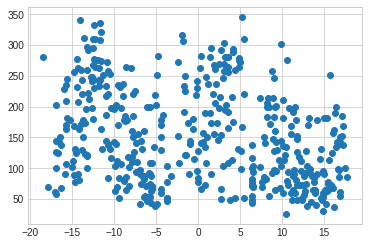

In [21]:
# SVM은 결국 Kernel function으로 차원을 높여서 분류 내지는 회기를 하는 것이기 때문에, 
# t-SNE나 다른 차원을 낮추는 방법을 통해 시각화해야 한다.

# X_comp = TSNE(n_components=1).fit_transform(X)
# plt.scatter(X_comp, y);

t_SNE = TSNE(n_components=1)
X_comp = t_SNE.fit_transform(X)
plt.scatter(X_comp, y);

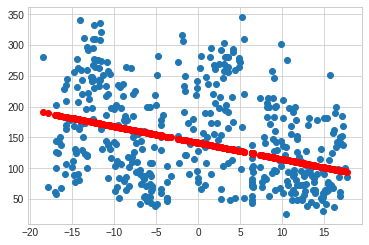

In [22]:
model = SVR(C=1, coef0=0.01, gamma='auto', kernel='linear')
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

# Support Vector Classifier (Breast Cancer Dataset)



## Before Scaling

In [23]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)

model = SVC()
model.fit(X_train, y_train)
print("Score for the train set: {}".format(model.score(X_train, y_train)))
print("Score for the test set: {}".format(model.score(X_test, y_test)))

Score for the train set: 0.9014084507042254
Score for the test set: 0.9230769230769231


## After Scaling

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
# df_scaled = pd.DataFrame(data = df_scaled)

model = SVC()
model.fit(X_train_scaled, y_train)
print("Score for the train set: {}".format(model.score(X_train_scaled, y_train)))
print("Score for the test set: {}".format(model.score(X_test_scaled, y_test)))

Score for the train set: 0.9835680751173709
Score for the test set: 0.986013986013986


## Cross Validation (GridSearch CV 와 겹치는 기능)

In [25]:
estimator = make_pipeline(StandardScaler(), SVC())

cross_validate(estimator=estimator, X=X, y=y, cv=5,
               n_jobs=multiprocessing.cpu_count(),
               verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.9s finished


{'fit_time': array([0.0097537 , 0.01101327, 0.00919986, 0.00881457, 0.00833106]),
 'score_time': array([0.00290561, 0.00267792, 0.00314236, 0.00257397, 0.00182343]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

## Finding the best set of hyperparameters


In [26]:
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],
         'gamma' : ('auto','scale')}

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

model = SVC()

gs = GridSearchCV(
    estimator = model,
    param_grid = param,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
             param_grid={'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                         'degree': [3, 8], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             verbose=True)

In [27]:
print("the best parameters: {}".format(gs.best_params_))
print("the best score: {}".format(gs.best_score_))
print("the best estimator: {}".format(gs.best_estimator_))
print("the best index: {}".format(gs.best_index_))

# the best parameters: {'C': 5, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
# the best score: 0.9789318428815401
# the best estimator: SVC(C=5, coef0=0.01, gamma='auto')
# the best index: 50

the best parameters: {'C': 5, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
the best score: 0.9789318428815401
the best estimator: SVC(C=5, coef0=0.01, gamma='auto')
the best index: 50


In [29]:
# With the best parameters
estimator = make_pipeline(StandardScaler(), 
                          SVC(C=5, coef0=0.01, gamma='auto', kernel='rbf'))
estimator.fit(X_train, y_train)

print("Score for the train set: {}".format(estimator.score(X_train, y_train)))
print("Score for the test set: {}".format(estimator.score(X_test, y_test)))

Score for the train set: 0.9882629107981221
Score for the test set: 0.993006993006993


## Visualization

### Using t-SNE

In [30]:
def make_meshgrid(x, y, h= 0.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

In [31]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.column_stack([xx.ravel(), yy.ravel()]))
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)
  return out

In [32]:
# 2차원으로 Dependent variables의 차원을 줄여주고, 
# 좌표평면의 색깔로 Class를 나타내는 방법
t_SNE = TSNE(n_components=2)
X_comp = t_SNE.fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


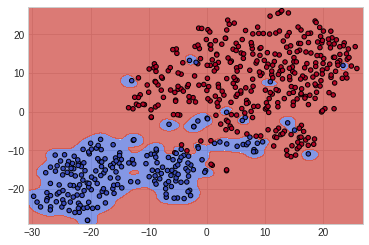

In [33]:
model = SVC(C=5, coef0=0.01, gamma='auto', kernel='rbf')
model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### Using PCA

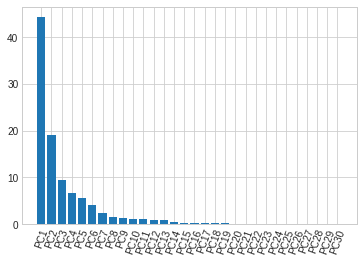

In [41]:
pca = PCA()

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

pca.fit(X_scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.xticks(rotation=70);


Text(0, 0.5, 'PC2 - 19.0%')

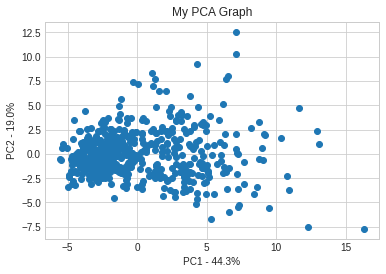

In [43]:
pca_data = pca.transform(X_scaled)
pca_df = pd.DataFrame(pca_data, columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

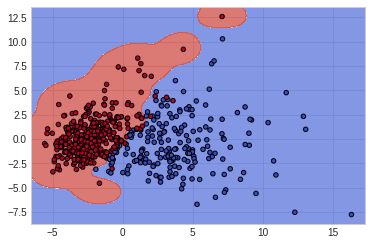

In [45]:
X0, X1 = pca_df.PC1, pca_df.PC2
pca_scaled_only2 = np.column_stack((X0, X1))
xx, yy = make_meshgrid(X0, X1)

model = SVC(C=5, coef0=0.01, gamma='auto', kernel='rbf')
model.fit(pca_scaled_only2, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');